## Import Libraries

In [1]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Helper function 
This helper function is used to plot the image , with a given title has a default value of **_"Image"_** , we also pass to the function color map argument that it has default value of **_gray_**


In [2]:
def show_image(image , title = "Image" , color_map = "gray") :
    plt.imshow(image , cmap= color_map)
    plt.title(title)
    plt.show

### Read the test image

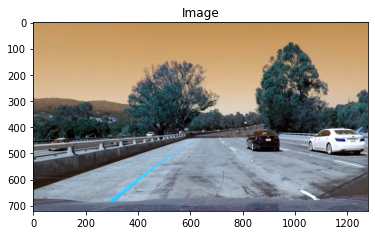

In [3]:
test_image = cv.imread("test_images/test1.jpg")
show_image(test_image)

### Change the color space 
we here change the color space of the image from BGR to RGB to show the real color space of the image

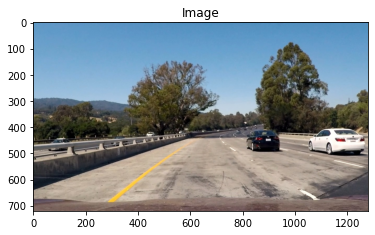

In [4]:
RGB_test_image = cv.cvtColor(test_image , cv.COLOR_BGR2RGB)
show_image(RGB_test_image)

### Image Dimensions

In [5]:
print("Image Shape" , RGB_test_image.shape)
image_width = RGB_test_image.shape[1]
image_height = RGB_test_image.shape[0]
print("Image width" , image_width)
print("Image height" , image_height)

Image Shape (720, 1280, 3)
Image width 1280
Image height 720


### Change the color space 
we here change the color space of the image from RGB to grayscale

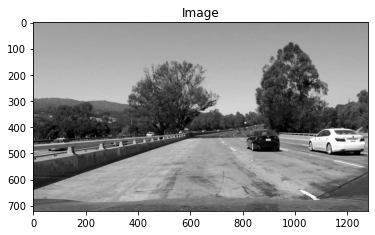

In [6]:
gray_test_image = cv.cvtColor(RGB_test_image , cv.COLOR_BGR2GRAY)
show_image(gray_test_image)

### Change color space
we here change the color space of the image from **_RGB_** into **_HLS_** color space as this color space would be very useful when we deal with image that has sunlight (part of it or whole of it), and that would make a very high noise and a cause of that that we will not determine any more the lane lines

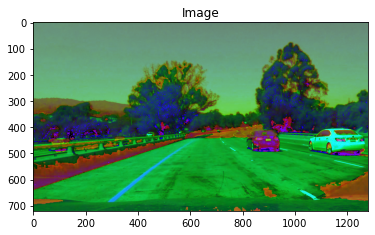

In [7]:
hls_test_image = cv.cvtColor(RGB_test_image , cv.COLOR_RGB2HLS)
show_image(hls_test_image)

### Split HLS into Channels
we here divide the HLS image into three channels as we desire to deal with S channel as it provide clear lane lines among the other channels

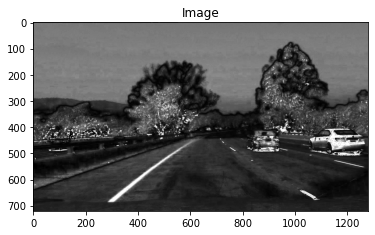

In [8]:
h , l , s = cv.split(hls_test_image)
show_image(s)

### Edge Detection
We will use **_Canny edge_** detection 

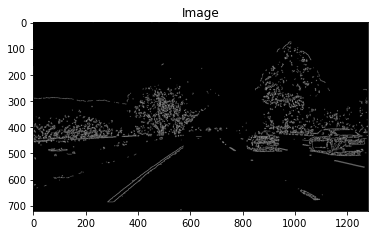

In [9]:
canny_test_image = cv.Canny(s , 200 , 255)
show_image(canny_test_image)

## Region Of Intereset
We will crop part of the photo where we are have more interest in this region to determine the lane lines , the steps are the following we make a black image with all zeros , then we have the vertices of ploy to draw on the black image , then making masking using python function `cv.bitwise_and()`

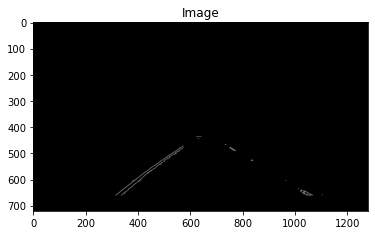

In [10]:
def region_of_intereset(image , vertices):
    blank = np.zeros_like(image)
    cv.fillPoly(blank , vertices , color = 255)
    cropped_region = cv.bitwise_and(image , blank)
    return cropped_region
vertices_of_region_of_interest = [(100 , 660) , (image_width / 2 , image_height / 2 + 65) , (1200 , 660)]
cropped_test_image = region_of_intereset(canny_test_image , np.array([vertices_of_region_of_interest] , np.int32))
show_image(cropped_test_image)

### Hough Transform

Hough Lines 34


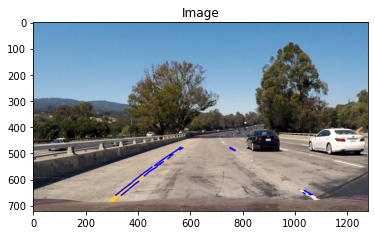

In [11]:
hough_lines = cv.HoughLinesP(cropped_test_image , 1 , np.pi / 180 , 20 , minLineLength = 7 , maxLineGap = 1)
print("Hough Lines" , len(hough_lines))
for line in hough_lines :
    x1 ,y1 ,x2 ,y2 = line[0]
    cv.line(RGB_test_image , (x1 , y1) , (x2 ,y2) , (0 , 0 , 255) , thickness = 4)
show_image(RGB_test_image)